In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("StudentsPerformance.csv")

In [15]:
desc_stats = df.describe().T

In [19]:
print("\n--- STATISTIK DESKRIPTIF DATASET ---\n")
print(desc_stats)
print("\n")


--- STATISTIK DESKRIPTIF DATASET ---

                count    mean        std   min    25%   50%   75%    max
math score     1000.0  66.089  15.163080   0.0  57.00  66.0  77.0  100.0
reading score  1000.0  69.169  14.600192  17.0  59.00  70.0  79.0  100.0
writing score  1000.0  68.054  15.195657  10.0  57.75  69.0  79.0  100.0




In [14]:
numeric_df = df.select_dtypes(include='number')
print(numeric_df.head(10))

   math score  reading score  writing score
0          72             72             74
1          69             90             88
2          90             95             93
3          47             57             44
4          76             78             75
5          71             83             78
6          88             95             92
7          40             43             39
8          64             64             67
9          38             60             50


In [10]:
num_records = df.shape[0]
num_attributes = df.shape[1]
attribute_names = df.columns.tolist()
num_numeric_attributes = numeric_df.shape[1]

print("\n--- INFO DATASET ---\n")
print(f"Jumlah record    : {num_records}")
print(f"Jumlah attribute : {num_attributes}")
print(f"Nama attribute   : {attribute_names}")
print(f"Jumlah attribute numerik: {num_numeric_attributes}\n")


--- INFO DATASET ---

Jumlah record    : 1000
Jumlah attribute : 8
Nama attribute   : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
Jumlah attribute numerik: 3



In [12]:
object_df = df.select_dtypes(include='object')
unique_labels = {col: object_df[col].nunique() for col in object_df.columns}

print("\n--- JUMLAH LABEL ATRIBUT OBJECT ----\n")
for col, val in unique_labels.items():
    print(f"{col} : {val}")
print("\n")
    


--- JUMLAH LABEL ATRIBUT OBJECT ----

gender : 2
race/ethnicity : 5
parental level of education : 6
lunch : 2
test preparation course : 2




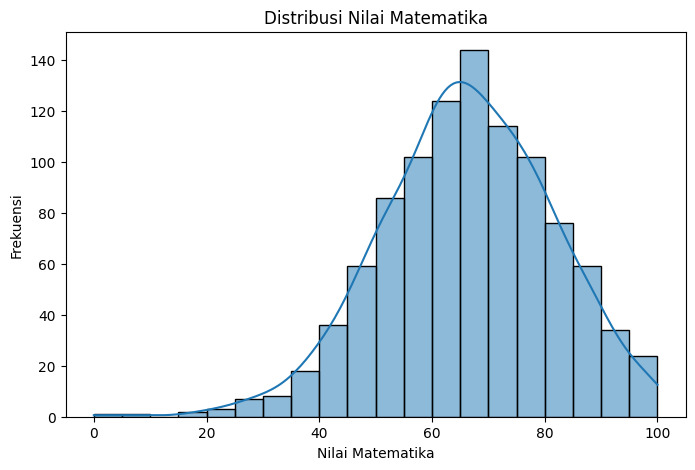

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["math score"], bins=20, kde=True)
plt.title("Distribusi Nilai Matematika")
plt.xlabel("Nilai Matematika")
plt.ylabel("Frekuensi")
plt.show()

##### Dari diagram histogram di atas didapatkan bahwa mayoritas siswa memperoleh nilai di kisaran 50–80. Distribusi nilai matematika cenderung normal, dengan puncak frekuensi berada di sekitar 60–70. Terdapat sebagian kecil siswa yang mendapat nilai sangat rendah (0–20) maupun sangat tinggi (90–100). Hal ini menunjukkan bahwa sebagian besar siswa memiliki kemampuan matematika pada tingkat menengah, sedangkan siswa yang berprestasi sangat tinggi maupun sangat rendah jumlahnya relatif sedikit.

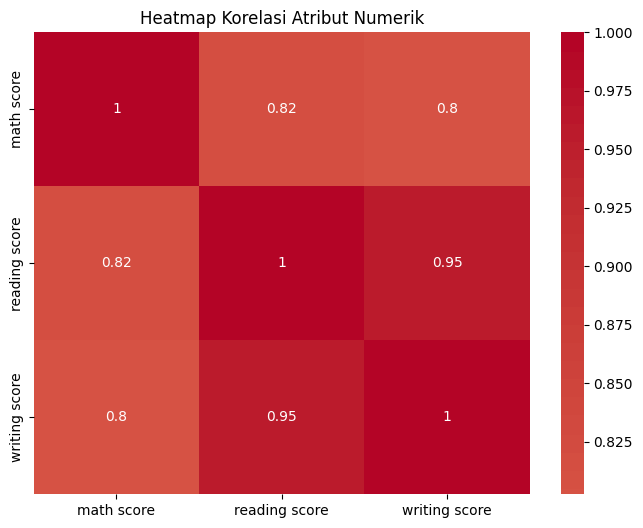

In [10]:
plt.figure(figsize=(8,6))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Atribut Numerik")
plt.show()

##### Dari heatmap korelasi di atas didapatkan bahwa terdapat hubungan yang sangat kuat antara nilai membaca (reading score) dan menulis (writing score) dengan nilai korelasi mendekati 1.0. Artinya, siswa yang memiliki kemampuan membaca yang baik cenderung memiliki kemampuan menulis yang baik pula. Selain itu, nilai matematika (math score) juga berkorelasi positif dengan nilai membaca dan menulis, meskipun tingkat korelasinya lebih rendah (sekitar 0.6–0.7). Hal ini menunjukkan bahwa meskipun ada hubungan antara kemampuan matematika dan kemampuan bahasa, namun hubungan terkuat tetap terlihat antara membaca dan menulis.

## Kesimpulan Analisis Data StudentsPerformance

1. **Statistik Deskriptif**
   - Rata-rata nilai **Matematika (66.09)**, **Membaca (69.17)**, dan **Menulis (68.05)** menunjukkan bahwa kemampuan siswa berada di level **menengah**.
   - Rentang nilai cukup lebar (**0–100**) pada Matematika, artinya ada siswa yang sangat lemah maupun sangat unggul.
   - Kuartil (Q1, Q2, Q3) menunjukkan bahwa 50% siswa memiliki nilai:
     - Matematika antara **57–77**
     - Membaca antara **59–79**
     - Menulis antara **58–79**

2. **Distribusi Nilai Matematika (Histogram)**
   - Dari diagram histogram didapatkan bahwa mayoritas siswa memperoleh nilai **50–80**, dengan puncak frekuensi di sekitar **60–70**.
   - Distribusi nilai cenderung **normal**, meskipun terdapat outlier dengan nilai sangat rendah (0–20) dan sangat tinggi (90–100).
   - Hal ini menunjukkan bahwa sebagian besar siswa memiliki kemampuan matematika yang rata-rata, hanya sedikit siswa yang sangat rendah/tinggi.

3. **Hubungan Antar Nilai (Heatmap Korelasi)**
   - Terdapat **korelasi sangat kuat** antara **Reading score** dan **Writing score** (mendekati 1.0).
   - Nilai Matematika juga berkorelasi positif dengan Reading dan Writing, tetapi lebih rendah (sekitar **0.6–0.7**).
   - Kesimpulannya, kemampuan bahasa (membaca & menulis) saling mendukung dengan sangat erat, sementara kemampuan matematika masih berkaitan tetapi tidak sekuat hubungan antar kemampuan bahasa.

4. **Variabel Kategori**
   - Dataset memiliki variabel kategori seperti **gender, race/ethnicity, parental education, lunch, dan test preparation**.
   - Analisis lebih lanjut (misalnya boxplot) bisa digunakan untuk melihat perbedaan nilai antar kategori tersebut.
   - Contohnya, apakah gender berpengaruh pada Math Score, atau apakah program persiapan ujian (test preparation) meningkatkan skor siswa.

---

### Kesimpulan Keseluruhan
- Sebagian besar siswa berada di **tingkat menengah** dalam ketiga bidang (Math, Reading, Writing).  
- **Kemampuan bahasa** (reading & writing) memiliki hubungan paling erat, sehingga siswa yang kuat membaca hampir pasti kuat menulis.  
- **Math Score** memiliki variasi yang besar dan lebih terdistribusi lebar, sehingga cocok dijadikan **variabel target** untuk prediksi/permodelan machine learning.  
- Faktor non-akademik (gender, latar belakang orang tua, persiapan ujian) berpotensi memberikan pengaruh terhadap performa siswa dan bisa menjadi fokus analisis lanjutan.  
